In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
# from matplotlib.font_manager import FontProperties

# 绘制漂亮的图形，避免模糊的图像
%config InlineBackend.figure_format = 'retina'
# 设置环境
sns.set_context('notebook')

# 忽略警告
import warnings
warnings.filterwarnings('ignore')

In [63]:
# tmp = pd.read_csv('./SAC_model01/progress_gamma=0.995_reward_scale=0.03125_noise=N_1.csv')
tmp = pd.read_csv('./SAC_model02/progress_gamma=0.995_reward_scale=0.03125_noise=OU_1.csv')
tmp.head()

,rollout/ep_len_mean,time/time_elapsed,time/episodes,rollout/ep_rew_mean,time/fps,time/total_timesteps,train/critic_loss,train/ent_coef,train/actor_loss,train/learning_rate,train/n_updates,eval/mean_ep_length,eval/mean_reward
0,6.5000,0.0,4.0,0.750000,111.0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.1250,0.0,8.0,0.625000,131.0,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0000,0.0,12.0,0.583333,154.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.6875,0.0,16.0,0.437500,164.0,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.1500,0.0,20.0,0.650000,171.0,103,0.372149,0.03125,-0.639181,0.0003,2.0,NaN,NaN


In [14]:
filename = os.listdir('./SAC_model01/')
gamma = 0.995
scale = [0.0625, 0.03125, 0.015625]
for name in filename:
    for i in range(len(scale)):
        if name.startswith('progress_gamma={}_reward_scale={}'.format(gamma, scale[i])):
            for j in range(7):
                if j == 0:
                    df = pd.read_csv('./SAC_model01/progress_gamma=0.995_reward_scale={}_noise=N_{}.csv'.format(scale[i], j))
                    df.insert(df.shape[1], 'group', j)
                else:
                    tmp = pd.read_csv('./SAC_model01/progress_gamma=0.995_reward_scale={}_noise=N_{}.csv'.format(scale[i], j))
                    tmp.insert(tmp.shape[1], 'group', j)
                    tmp.insert(tmp.shape[1], 'reward_scale', str(scale[i]))
                    df = pd.concat([df, tmp], axis=0)
            newdf = pd.DataFrame(df, columns=['group', 'time/episodes', 'rollout/ep_rew_mean', 'reward_scale'])
#             newdf = newdf.set_index('time/episodes')
            newdf = newdf.dropna()
            exec(f'df_{i} = newdf')

In [68]:
filename = os.listdir('./SAC_model02/')
gamma = 0.995
scale = [0.0625, 0.03125, 0.015625]
for name in filename:
    for i in range(len(scale)):
        if name.startswith('progress_gamma={}_reward_scale={}'.format(gamma, scale[i])):
            for j in range(7):
                if j == 0:
                    df = pd.read_csv('./SAC_model02/progress_gamma=0.995_reward_scale={}_noise=OU_{}.csv'.format(scale[i], j))
                    df.insert(df.shape[1], 'group', j)
                else:
                    tmp = pd.read_csv('./SAC_model02/progress_gamma=0.995_reward_scale={}_noise=OU_{}.csv'.format(scale[i], j))
                    tmp.insert(tmp.shape[1], 'group', j)
                    tmp.insert(tmp.shape[1], 'reward_scale', str(scale[i]))
                    df = pd.concat([df, tmp], axis=0)
            newdf = pd.DataFrame(df, columns=['group', 'time/episodes', 'rollout/ep_rew_mean', 'reward_scale'])
#             newdf = newdf.set_index('time/episodes')
            newdf = newdf.dropna()
            exec(f'df_{i} = newdf')

In [80]:
filename = os.listdir('./DDPG_model01/')
gamma = 0.995
bs = [64, 128, 256, 512]
for name in filename:
    for i in range(len(bs)):
        if name.startswith('progress_gamma={}_batch_size={}'.format(gamma, bs[i])):
            for j in range(7):
                if j == 0:
                    df = pd.read_csv('./DDPG_model01/progress_gamma=0.995_batch_size={}_noise=N_{}.csv'.format(bs[i], j))
                    df.insert(df.shape[1], 'group', j)
                else:
                    tmp = pd.read_csv('./DDPG_model01/progress_gamma=0.995_batch_size={}_noise=N_{}.csv'.format(bs[i], j))
                    tmp.insert(tmp.shape[1], 'group', j)
                    tmp.insert(tmp.shape[1], 'batch_size', str(bs[i]))
                    df = pd.concat([df, tmp], axis=0)
            newdf = pd.DataFrame(df, columns=['group', 'time/episodes', 'rollout/ep_rew_mean', 'batch_size'])
#             newdf = newdf.set_index('time/episodes')
            newdf = newdf.dropna()
            exec(f'df_{i} = newdf')

In [85]:
filename = os.listdir('./DDPG_model02/')
gamma = 0.995
bs = [64, 128, 256, 512]
for name in filename:
    for i in range(len(bs)):
        if name.startswith('progress_gamma={}_batch_size={}'.format(gamma, bs[i])):
            for j in range(7):
                if j == 0:
                    df = pd.read_csv('./DDPG_model02/progress_gamma=0.995_batch_size={}_noise=OU_{}.csv'.format(bs[i], j))
                    df.insert(df.shape[1], 'group', j)
                else:
                    tmp = pd.read_csv('./DDPG_model02/progress_gamma=0.995_batch_size={}_noise=OU_{}.csv'.format(bs[i], j))
                    tmp.insert(tmp.shape[1], 'group', j)
                    tmp.insert(tmp.shape[1], 'batch_size', str(bs[i]))
                    df = pd.concat([df, tmp], axis=0)
            newdf = pd.DataFrame(df, columns=['group', 'time/episodes', 'rollout/ep_rew_mean', 'batch_size'])
#             newdf = newdf.set_index('time/episodes')
            newdf = newdf.dropna()
            exec(f'df_{i} = newdf')

In [31]:
filename = os.listdir('./TD3_model01/')

noise = [0.1, 0.2, 0.3, 0.4, 0.5]
delay = [1,2,3,4,5,6]
for name in filename:
    for i in range(len(noise)):
        if name.startswith('progress_gamma=0.995_sigma=0.25_policy_noise={}_delay=2'.format(noise[i])):
            for j in range(7):
                if j == 0:
                    df = pd.read_csv('./TD3_model01/progress_gamma=0.995_sigma=0.25_policy_noise={}_delay=2_{}.csv'.format(noise[i], j))
                    df.insert(df.shape[1], 'group', j)
                else:
                    tmp = pd.read_csv('./TD3_model01/progress_gamma=0.995_sigma=0.25_policy_noise={}_delay=2_{}.csv'.format(noise[i], j))
                    tmp.insert(tmp.shape[1], 'group', j)
                    tmp.insert(tmp.shape[1], 'policy_noise', str(noise[i]))
                    df = pd.concat([df, tmp], axis=0)
            newdf = pd.DataFrame(df, columns=['group', 'time/episodes', 'rollout/ep_rew_mean', 'policy_noise'])
#             newdf = newdf.set_index('time/episodes')
            newdf = newdf.dropna()
            exec(f'df_{i} = newdf')

In [41]:
filename = os.listdir('./TD3_model01/')

noise = [0.1, 0.2, 0.3, 0.4, 0.5]
delay = [1,2,3,4,5,6]
for name in filename:
    for i in range(len(delay)):
        if name.startswith('progress_gamma=0.995_sigma=0.25_policy_noise=0.2_delay={}'.format(delay[i])):
            for j in range(7):
                if j == 0:
                    df = pd.read_csv('./TD3_model01/progress_gamma=0.995_sigma=0.25_policy_noise=0.2_delay={}_{}.csv'.format(delay[i], j))
                    df.insert(df.shape[1], 'group', j)
                else:
                    tmp = pd.read_csv('./TD3_model01/progress_gamma=0.995_sigma=0.25_policy_noise=0.2_delay={}_{}.csv'.format(delay[i], j))
                    tmp.insert(tmp.shape[1], 'group', j)
                    tmp.insert(tmp.shape[1], 'update_delay', str(delay[i]))
                    df = pd.concat([df, tmp], axis=0)
            newdf = pd.DataFrame(df, columns=['group', 'time/episodes', 'rollout/ep_rew_mean', 'update_delay'])
#             newdf = newdf.set_index('time/episodes')
            newdf = newdf.dropna()
            exec(f'df_{i} = newdf')

In [37]:
filename = os.listdir('./TD3_model02/')

noise = [0.1, 0.2, 0.3, 0.4, 0.5]
delay = [1,2,3,4,5,6]
for name in filename:
    for i in range(len(noise)):
        if name.startswith('progress_gamma=0.995_policy_noise={}_delay=2_noise=OU'.format(noise[i])):
            for j in range(7):
                if j == 0:
                    df = pd.read_csv('./TD3_model02/progress_gamma=0.995_policy_noise={}_delay=2_noise=OU_{}.csv'.format(noise[i], j))
                    df.insert(df.shape[1], 'group', j)
                else:
                    tmp = pd.read_csv('./TD3_model02/progress_gamma=0.995_policy_noise={}_delay=2_noise=OU_{}.csv'.format(noise[i], j))
                    tmp.insert(tmp.shape[1], 'group', j)
                    tmp.insert(tmp.shape[1], 'policy_noise', str(noise[i]))
                    df = pd.concat([df, tmp], axis=0)
            newdf = pd.DataFrame(df, columns=['group', 'time/episodes', 'rollout/ep_rew_mean', 'policy_noise'])
#             newdf = newdf.set_index('time/episodes')
            newdf = newdf.dropna()
            exec(f'df_{i} = newdf')

In [45]:
filename = os.listdir('./TD3_model02/')

noise = [0.1, 0.2, 0.3, 0.4, 0.5]
delay = [1,2,3,4,5,6]
for name in filename:
    for i in range(len(delay)):
        if name.startswith('progress_gamma=0.995_policy_noise=0.2_delay={}_noise=OU'.format(delay[i])):
            for j in range(7):
                if j == 0:
                    df = pd.read_csv('./TD3_model02/progress_gamma=0.995_policy_noise=0.2_delay={}_noise=OU_{}.csv'.format(delay[i], j))
                    df.insert(df.shape[1], 'group', j)
                else:
                    tmp = pd.read_csv('./TD3_model02/progress_gamma=0.995_policy_noise=0.2_delay={}_noise=OU_{}.csv'.format(delay[i], j))
                    tmp.insert(tmp.shape[1], 'group', j)
                    tmp.insert(tmp.shape[1], 'update_delay', str(delay[i]))
                    df = pd.concat([df, tmp], axis=0)
            newdf = pd.DataFrame(df, columns=['group', 'time/episodes', 'rollout/ep_rew_mean', 'update_delay'])
#             newdf = newdf.set_index('time/episodes')
            newdf = newdf.dropna()
            exec(f'df_{i} = newdf')

In [68]:
filename = os.listdir('./noise=OU/')

for name in filename:
    if name.startswith('progress_gamma=0.995_batch_size'):
        for j in range(7):
            if j == 0:
                df = pd.read_csv('./noise=OU/progress_gamma=0.995_batch_size=256_noise=OU_{}.csv'.format(j))
                df.insert(df.shape[1], 'group', j)
            else:
                tmp = pd.read_csv('./noise=OU/progress_gamma=0.995_batch_size=256_noise=OU_{}.csv'.format(j))
                tmp.insert(tmp.shape[1], 'group', j)
                tmp.insert(tmp.shape[1], 'algorithm', 'DDPG')
                df = pd.concat([df, tmp], axis=0)
        newdf = pd.DataFrame(df, columns=['group', 'time/episodes', 'rollout/ep_rew_mean', 'algorithm'])
        newdf = newdf.dropna()
        df_ddpg = newdf
    elif name.startswith('progress_gamma=0.995_policy_noise'):
        for j in range(7):
            if j == 0:
                df = pd.read_csv('./noise=OU/progress_gamma=0.995_policy_noise=0.2_delay=6_noise=OU_{}.csv'.format(j))
                df.insert(df.shape[1], 'group', j)
            else:
                tmp = pd.read_csv('./noise=OU/progress_gamma=0.995_policy_noise=0.2_delay=6_noise=OU_{}.csv'.format(j))
                tmp.insert(tmp.shape[1], 'group', j)
                tmp.insert(tmp.shape[1], 'algorithm', 'TD3')
                df = pd.concat([df, tmp], axis=0)
        newdf = pd.DataFrame(df, columns=['group', 'time/episodes', 'rollout/ep_rew_mean', 'algorithm'])
        newdf = newdf.dropna()
        df_td3 = newdf
    else:
        for j in range(7):
            if j == 0:
                df = pd.read_csv('./noise=OU/progress_gamma=0.995_reward_scale=0.03125_noise=OU_{}.csv'.format(j))
                df.insert(df.shape[1], 'group', j)
            else:
                tmp = pd.read_csv('./noise=OU/progress_gamma=0.995_reward_scale=0.03125_noise=OU_{}.csv'.format(j))
                tmp.insert(tmp.shape[1], 'group', j)
                tmp.insert(tmp.shape[1], 'algorithm', 'SAC')
                df = pd.concat([df, tmp], axis=0)
        newdf = pd.DataFrame(df, columns=['group', 'time/episodes', 'rollout/ep_rew_mean', 'algorithm'])
        newdf = newdf.dropna()
        df_sac = newdf

In [75]:
filename = os.listdir('./noise=Normal/')

for name in filename:
    if name.startswith('progress_gamma=0.995_batch_size'):
        for j in range(7):
            if j == 0:
                df = pd.read_csv('./noise=Normal/progress_gamma=0.995_batch_size=128_noise=N_{}.csv'.format(j))
                df.insert(df.shape[1], 'group', j)
            else:
                tmp = pd.read_csv('./noise=Normal/progress_gamma=0.995_batch_size=128_noise=N_{}.csv'.format(j))
                tmp.insert(tmp.shape[1], 'group', j)
                tmp.insert(tmp.shape[1], 'algorithm', 'DDPG')
                df = pd.concat([df, tmp], axis=0)
        newdf = pd.DataFrame(df, columns=['group', 'time/episodes', 'rollout/ep_rew_mean', 'algorithm'])
        newdf = newdf.dropna()
        df_ddpg = newdf
    elif name.startswith('progress_gamma=0.995_policy_noise'):
        for j in range(7):
            if j == 0:
                df = pd.read_csv('./noise=Normal/progress_gamma=0.995_sigma=0.25_policy_noise=0.4_delay=2_{}.csv'.format(j))
                df.insert(df.shape[1], 'group', j)
            else:
                tmp = pd.read_csv('./noise=Normal/progress_gamma=0.995_sigma=0.25_policy_noise=0.4_delay=2_{}.csv'.format(j))
                tmp.insert(tmp.shape[1], 'group', j)
                tmp.insert(tmp.shape[1], 'algorithm', 'TD3')
                df = pd.concat([df, tmp], axis=0)
        newdf = pd.DataFrame(df, columns=['group', 'time/episodes', 'rollout/ep_rew_mean', 'algorithm'])
        newdf = newdf.dropna()
        df_td3 = newdf
    else:
        for j in range(7):
            if j == 0:
                df = pd.read_csv('./noise=Normal/progress_gamma=0.995_reward_scale=0.03125_noise=N_{}.csv'.format(j))
                df.insert(df.shape[1], 'group', j)
            else:
                tmp = pd.read_csv('./noise=Normal/progress_gamma=0.995_reward_scale=0.03125_noise=N_{}.csv'.format(j))
                tmp.insert(tmp.shape[1], 'group', j)
                tmp.insert(tmp.shape[1], 'algorithm', 'SAC')
                df = pd.concat([df, tmp], axis=0)
        newdf = pd.DataFrame(df, columns=['group', 'time/episodes', 'rollout/ep_rew_mean', 'algorithm'])
        newdf = newdf.dropna()
        df_sac = newdf

In [51]:
# SAC
df_all = pd.concat([df_0,df_1,df_2],axis=0)
df_all.columns = ['group','episodes', 'mean episodic training reward', 'reward_scale']

In [86]:
# DDPG
df_all = pd.concat([df_0,df_1,df_2,df_3],axis=0)
df_all.columns = ['group','episodes', 'mean episodic training reward', 'batch_size']

In [46]:
# TD3
# df_all = pd.concat([df_0,df_1,df_2,df_3,df_4],axis=0)
# df_all.columns = ['group','episodes', 'mean episodic training reward', 'policy_noise']

df_all = pd.concat([df_0,df_1,df_2,df_3,df_4,df_5],axis=0)
df_all.columns = ['group','episodes', 'mean episodic training reward', 'update_delay']

In [76]:
# alg
df_all = pd.concat([df_sac,df_ddpg,df_td3],axis=0)
df_all.columns = ['group','episodes', 'mean episodic training reward', 'algorithm']

In [77]:
df_all

,group,episodes,mean episodic training reward,algorithm
0,1,4.0,0.500000,SAC
1,1,8.0,0.500000,SAC
2,1,12.0,0.666667,SAC
3,1,16.0,0.687500,SAC
4,1,20.0,0.700000,SAC
...,...,...,...,...
521,6,2056.0,17.010000,TD3
522,6,2060.0,17.230000,TD3
523,6,2064.0,17.550000,TD3
524,6,2068.0,17.920000,TD3


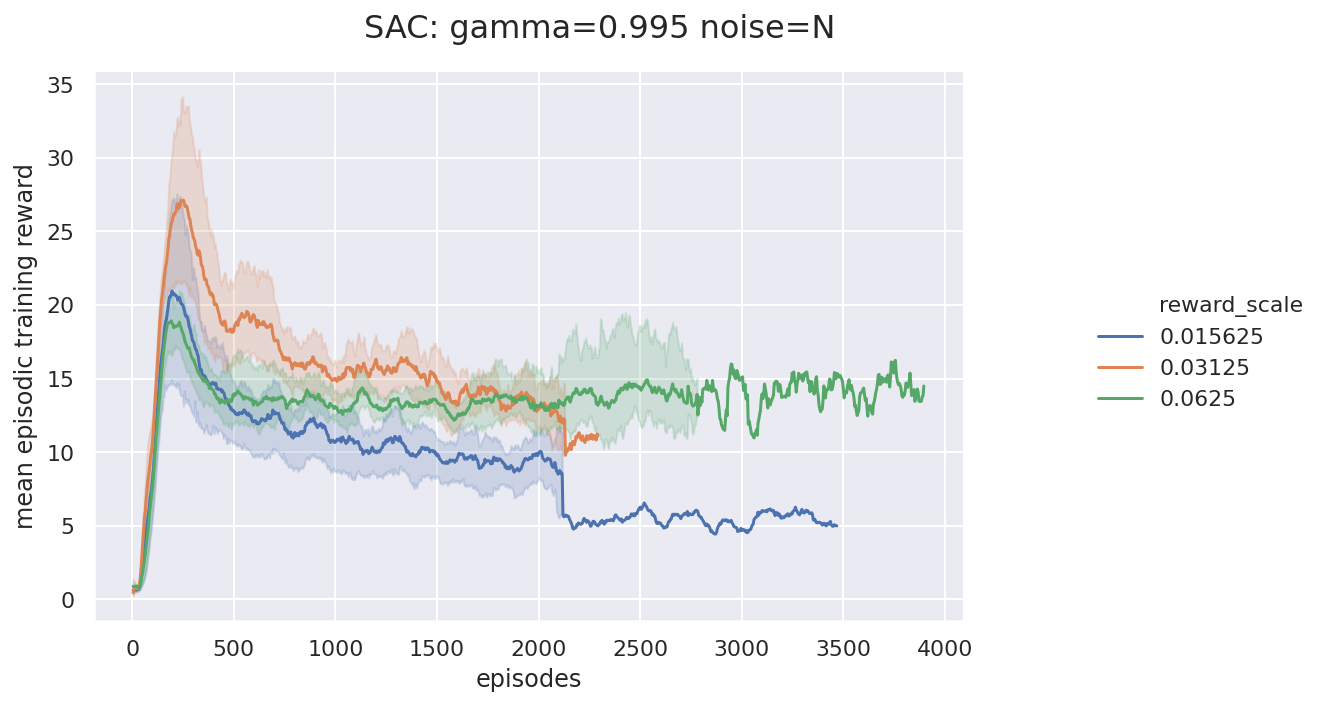

In [19]:
# plt.figure(figsize=(6, 3))
# myfont=FontProperties(fname=r'C:\\Windows\\Fonts\\simsun.ttc')
# sns.set(font=myfont.get_name())
sns.set_style("darkgrid")
sns.set_style(rc={'linewidth':1})



g = sns.relplot(x='episodes', y='mean episodic training reward', hue='reward_scale',
            data=df_all, kind='line', palette='deep')

# plt.xlabel("timesteps")
# plt.ylabel("mean episodic training reward")
# plt.title('SAC: progress_gamma={}'.format(gamma))

# leg = g._legend
# leg.set_bbox_to_anchor([0.8,0.5])

g.fig.set_size_inches(10,5)
# g.fig.suptitle('SAC: gamma={} noise=N'.format(gamma), fontsize=16)
g.fig.suptitle('SAC: gamma={} noise=OU'.format(gamma), fontsize=16)
g.fig.subplots_adjust(top=0.9)

# plt.legend(loc='upper right')
plt.show()
# plt.xlabel("timesteps")
# plt.ylabel("mean episodic training reward")
# plt.title('SAC: progress_gamma={}'.format(gamma))
# plt.figure(figsize=(6, 3))

# plt.legend(loc='center right', bbox_to_anchor=(1,0.1), ncol=1)



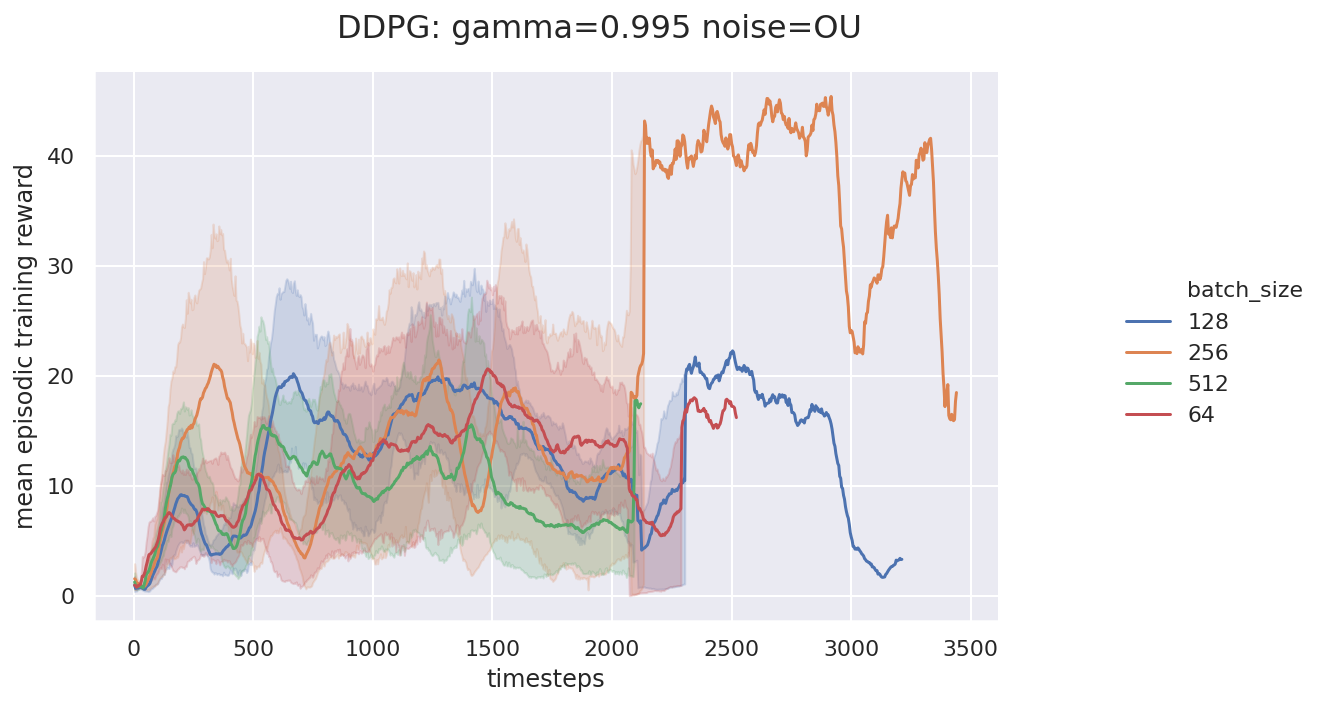

In [89]:
sns.set_style("darkgrid")
sns.set_style(rc={'linewidth':1})

g = sns.relplot(x='episodes', y='mean episodic training reward', hue='batch_size',
            data=df_all, kind='line', palette='deep')

g.fig.set_size_inches(10,5)
# g.fig.suptitle('DDPG: gamma={} noise=N'.format(gamma), fontsize=16)
g.fig.suptitle('DDPG: gamma={} noise=OU'.format(gamma), fontsize=16)
g.fig.subplots_adjust(top=0.9)

plt.show()

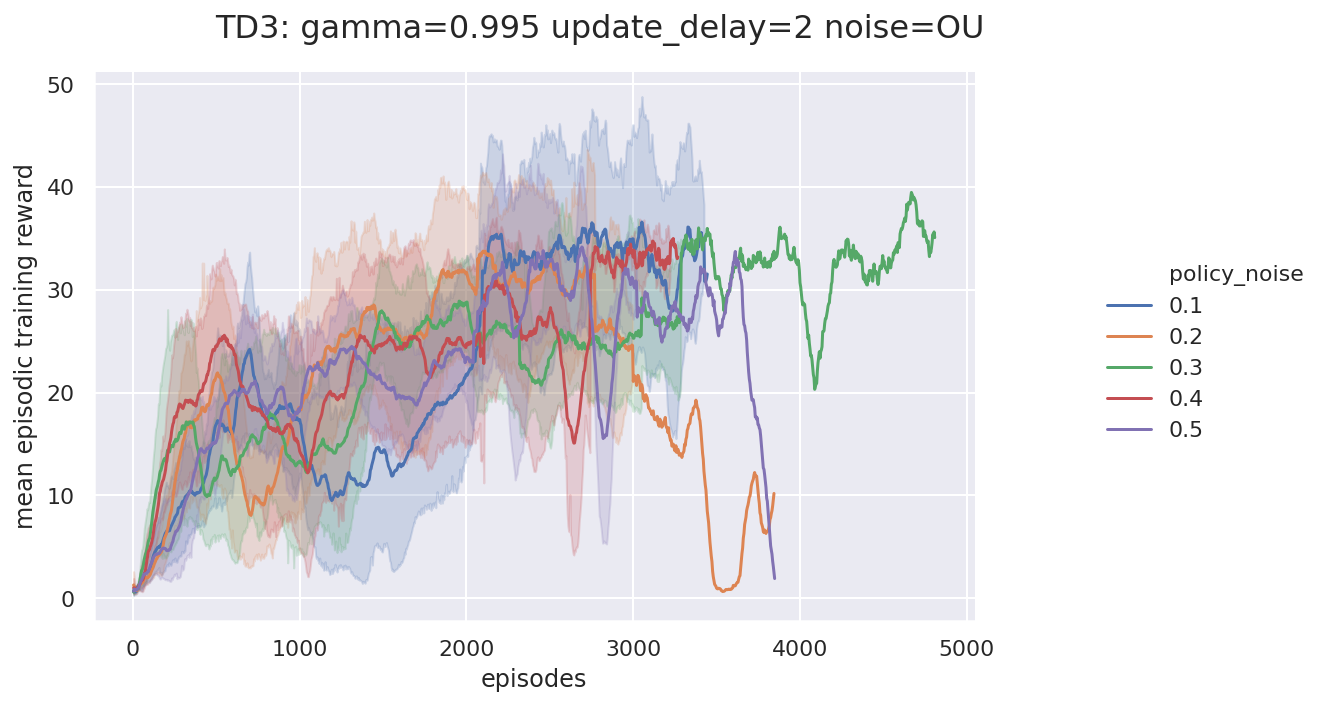

In [40]:
sns.set_style("darkgrid")
sns.set_style(rc={'linewidth':1})

g = sns.relplot(x='episodes', y='mean episodic training reward', hue='policy_noise',
            data=df_all, kind='line', palette='deep')

g.fig.set_size_inches(10,5)
g.fig.suptitle('TD3: gamma=0.995 update_delay=2 noise=OU', fontsize=16)
# g.fig.suptitle('TD3: gamma=0.995 update_delay=2 noise=OU', fontsize=16)
g.fig.subplots_adjust(top=0.9)

plt.show()

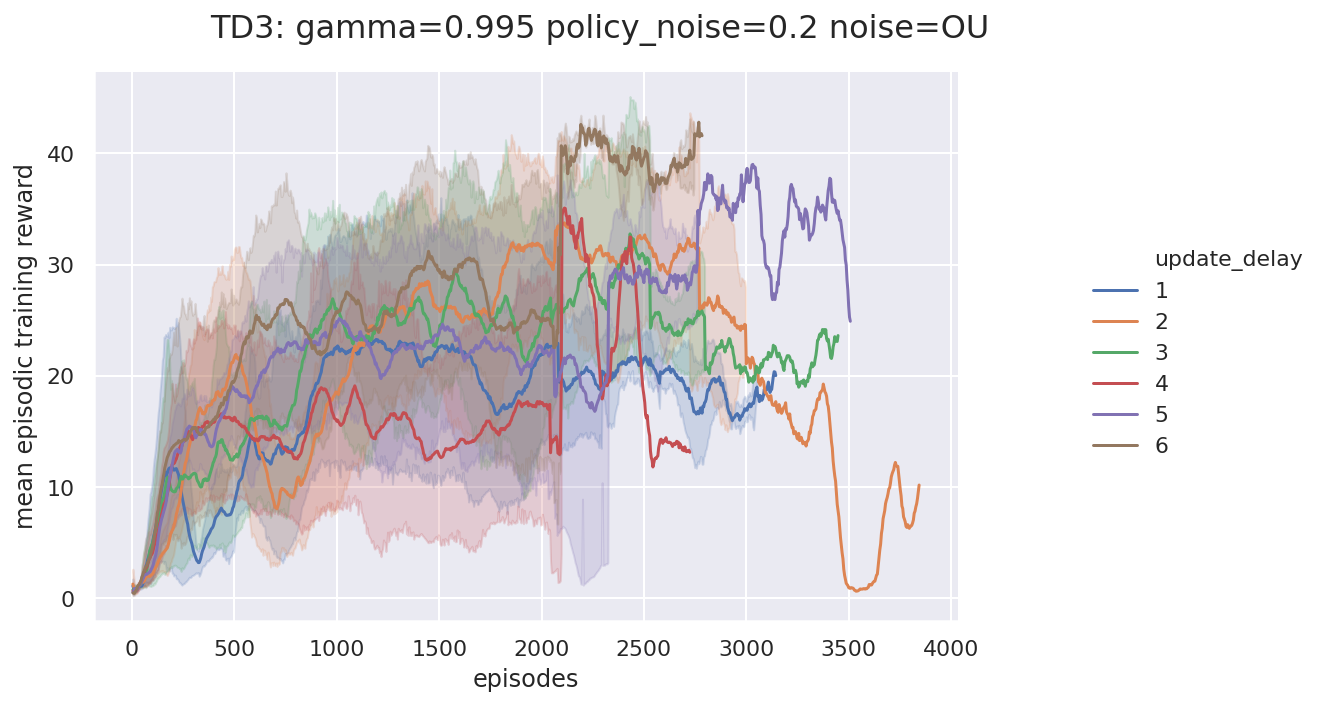

In [48]:
sns.set_style("darkgrid")
sns.set_style(rc={'linewidth':1})

g = sns.relplot(x='episodes', y='mean episodic training reward', hue='update_delay',
            data=df_all, kind='line', palette='deep')

g.fig.set_size_inches(10,5)
g.fig.suptitle('TD3: gamma=0.995 policy_noise=0.2 noise=OU', fontsize=16)
# g.fig.suptitle('TD3: gamma=0.995 policy_noise=0.2 noise=OU', fontsize=16)
g.fig.subplots_adjust(top=0.9)

plt.show()

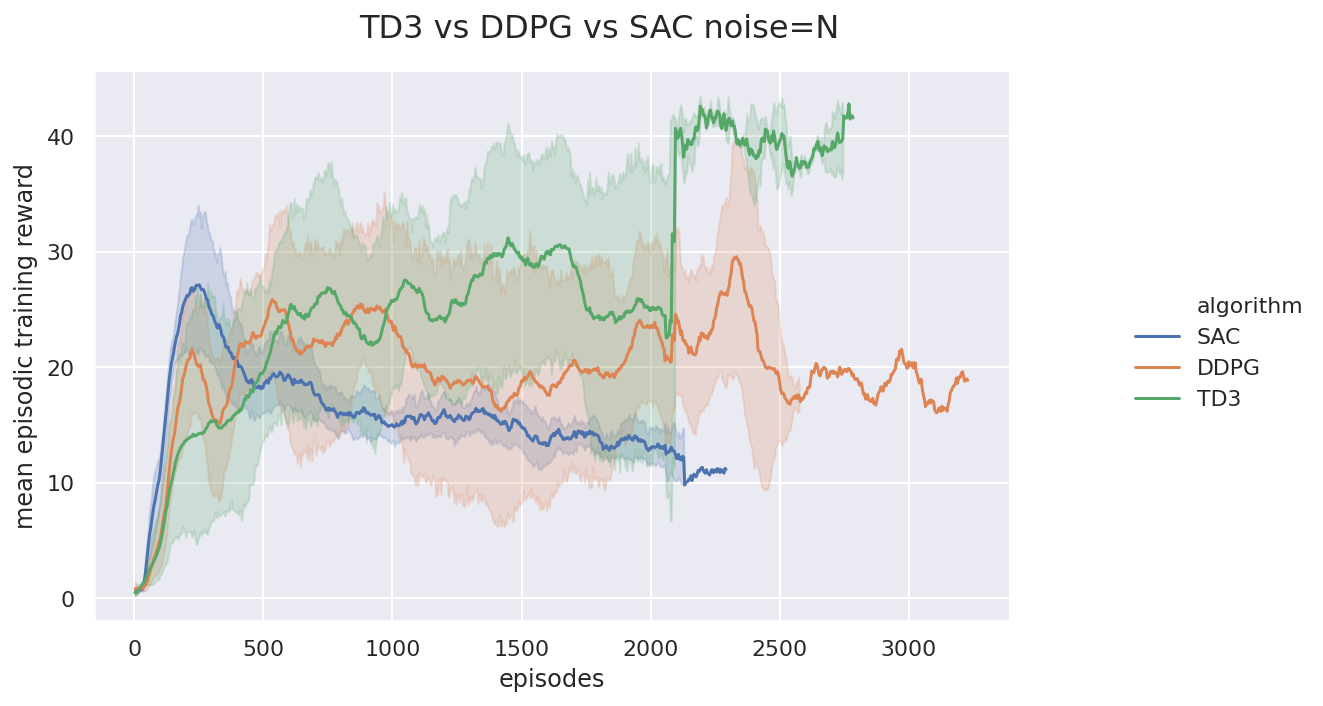

In [79]:
sns.set_style("darkgrid")
sns.set_style(rc={'linewidth':1})

g = sns.relplot(x='episodes', y='mean episodic training reward', hue='algorithm',
            data=df_all, kind='line', palette='deep')

g.fig.set_size_inches(10,5)
g.fig.suptitle('TD3 vs DDPG vs SAC noise=N', fontsize=16)
# g.fig.suptitle('TD3: gamma=0.995 policy_noise=0.2 noise=OU', fontsize=16)
g.fig.subplots_adjust(top=0.9)

plt.show()